# Logistic Regression

Generating Data

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets._samples_generator import make_blobs
X, y = make_blobs(n_samples=250, centers=2, n_features=2, cluster_std=5, random_state=11)
m = 200
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

Vizualizing Data


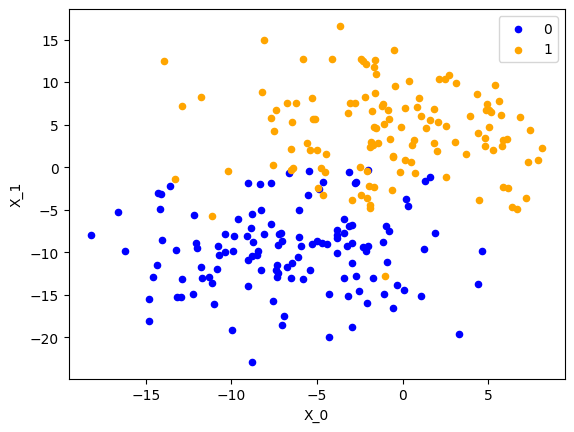

In [2]:
from matplotlib import pyplot as plt
from pandas import DataFrame 
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()

## Logistic Model

In [3]:
from logistic_regression import LogisticRegression
model = LogisticRegression(lr=0.01, num_iters=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ROC AUC Score: 0.85


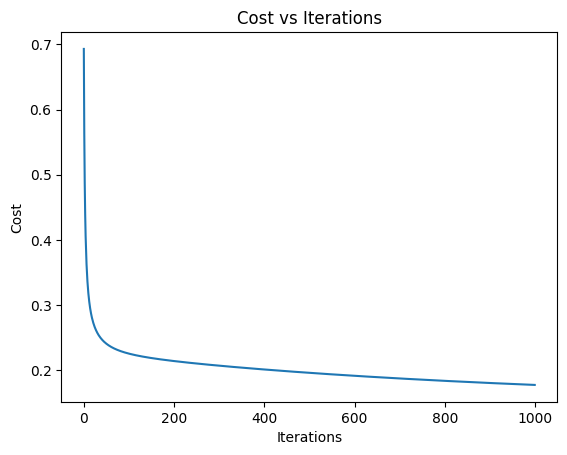

In [4]:

from sklearn.metrics import roc_auc_score
accuracy = roc_auc_score(y_test, y_pred)
cost = model.get_cost_history()
print(f"ROC AUC Score: {accuracy:.2f}")

plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()


Vizualizing the Result

NameError: name 'np' is not defined

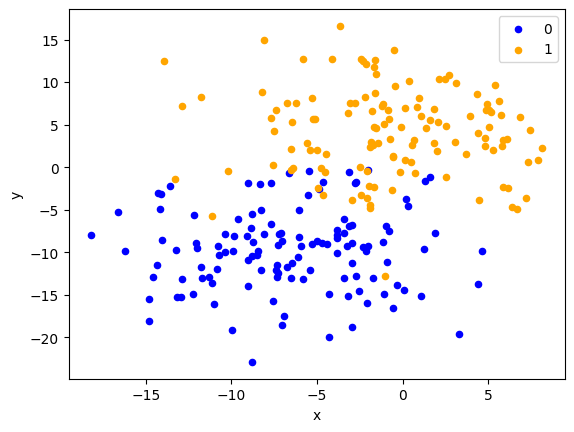

In [6]:
def my_formula(x):
    return (-model.bias - model.weights[0] * x) / model.weights[1]

def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x, y)

from matplotlib import pyplot as plt
from pandas import DataFrame 
import numpy as np
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X_0')
plt.ylabel('X_1')
plt.show()